In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import warnings



In [2]:
df=pd.read_csv("loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### problem statement

In [3]:
# To find customer eligibility for loan 

### EDA

In [4]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

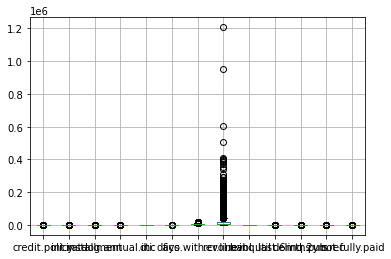

In [5]:
df.boxplot(figsize=(14,7))

In [6]:
## outlier handling

In [7]:
# by using iqr method

<AxesSubplot:>

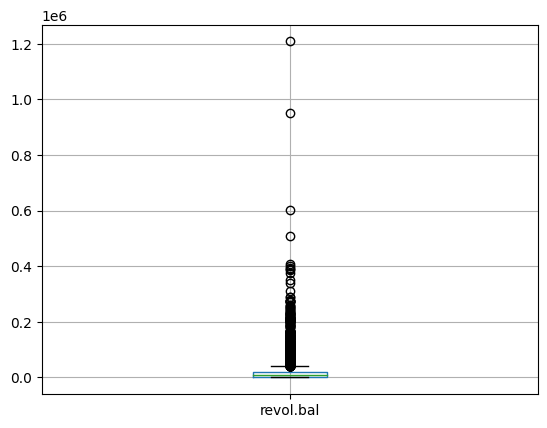

In [8]:
df[["revol.bal"]].boxplot()

In [9]:
q1=df["revol.bal"].quantile(0.25)
q3=df["revol.bal"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
print(upper_limit)

df[["revol.bal"]].loc[df["revol.bal"]>upper_limit]
df.loc[df["revol.bal"]>upper_limit,"revol.bal"]=upper_limit





40843.25


<AxesSubplot:>

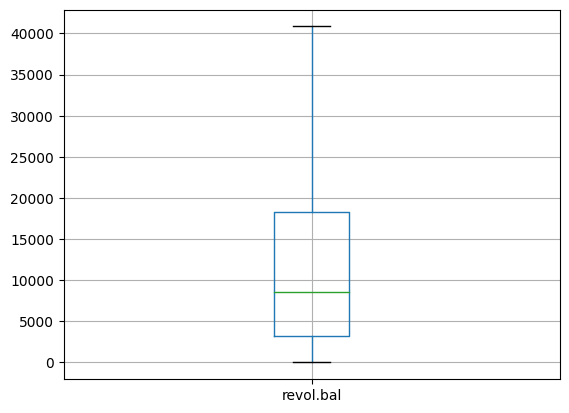

In [10]:
df[["revol.bal"]].boxplot()

In [11]:
###by using z_score method

In [12]:
z_score_value=np.abs(zscore(df["days.with.cr.line"]))
print(z_score_value)
array1=np.where(z_score_value>3)
print(array1)

0       0.432230
1       0.721230
2       0.059770
3       0.745277
4       0.198161
          ...   
9573    2.368325
9574    0.072400
9575    0.444860
9576    1.105722
9577    0.071785
Name: days.with.cr.line, Length: 9578, dtype: float64
(array([  55,   92,  113,  178,  192,  225,  227,  370,  476,  502,  632,
        851,  919, 1046, 1092, 1216, 1265, 1317, 1330, 1378, 1379, 1687,
       1937, 1976, 2081, 2127, 2255, 2317, 2334, 2435, 2460, 2506, 2573,
       2653, 2663, 2743, 2799, 2803, 2807, 2812, 2864, 2989, 3117, 3228,
       3409, 3496, 3509, 3514, 3545, 3551, 3579, 3800, 3885, 3936, 3967,
       4041, 4046, 4120, 4335, 4373, 4452, 4492, 4562, 4832, 4904, 4996,
       5018, 5299, 5301, 5310, 5332, 5483, 5518, 5560, 5664, 5666, 5766,
       5795, 5801, 5857, 5860, 5870, 5877, 6014, 6282, 6416, 6434, 6480,
       6540, 6645, 6681, 6690, 6703, 6712, 6719, 6768, 6775, 6781, 6849,
       6880, 6884, 6911, 6943, 6960, 7009, 7056, 7067, 7187, 7441, 7497,
       7553, 7554, 7560, 760

In [13]:
array=df["days.with.cr.line"].to_numpy()
print(array)

[5639.958333 2760.       4710.       ... 3450.041667 1800.
 4740.      ]


In [14]:
array[array1]

array([14008.95833, 13349.95833, 16213.     , 12960.04167, 16259.04167,
       12930.04167, 12780.     , 13109.     , 12554.04167, 13319.04167,
       12668.04167, 12330.     , 14100.     , 13259.95833, 13349.95833,
       12150.     , 12450.     , 12407.     , 13260.     , 14159.95833,
       13620.     , 14580.     , 13770.     , 12433.     , 12153.04167,
       14167.     , 13470.     , 15150.04167, 12540.04167, 13380.04167,
       14760.     , 15420.95833, 13080.     , 12391.     , 13681.     ,
       12330.     , 12390.     , 13770.     , 13410.     , 12539.95833,
       13830.     , 12209.95833, 15089.95833, 13140.     , 14133.     ,
       14191.     , 12060.     , 13020.     , 12810.     , 13334.95833,
       12266.95833, 13410.     , 12629.95833, 15419.95833, 13140.     ,
       15119.95833, 15360.     , 12120.     , 13049.95833, 14009.95833,
       14039.95833, 13500.     , 13111.     , 13379.95833, 12480.     ,
       14310.     , 13170.     , 13109.95833, 15299.95833, 12930

In [15]:
df[["days.with.cr.line"]].iloc[array1]

,days.with.cr.line
55,14008.95833
92,13349.95833
113,16213.00000
178,12960.04167
192,16259.04167
...,...
9328,12150.00000
9366,15271.00000
9386,13170.04167
9393,12344.00000


In [16]:
array[array1]=df["days.with.cr.line"].median()

<AxesSubplot:>

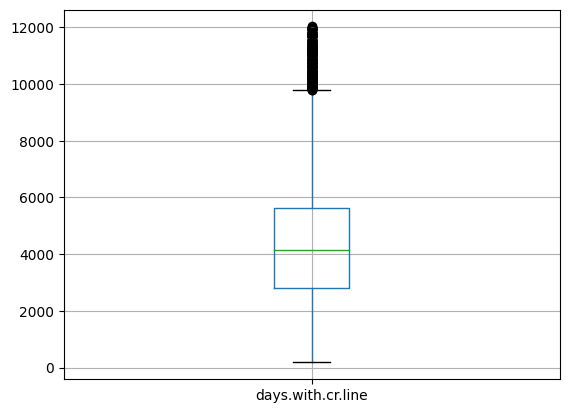

In [17]:
df[["days.with.cr.line"]].boxplot()

<AxesSubplot:>

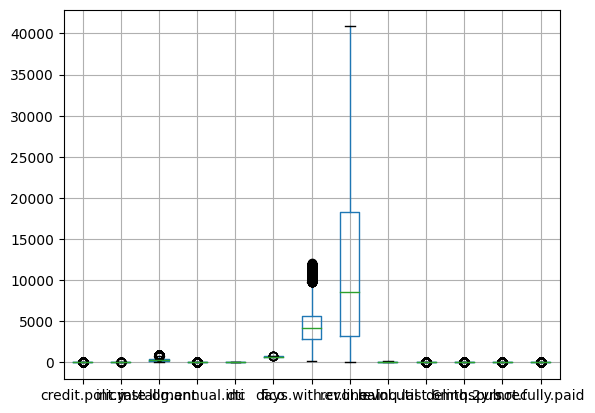

In [18]:
df.boxplot()

In [19]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.00,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.00,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.00,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667.00,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.00,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,40843.25,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184.00,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036.00,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0.00,3.2,5,0,0,1


In [20]:
#encoading

In [28]:
df=pd.get_dummies(df,columns=["purpose"])


In [29]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.00,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.00,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.00,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667.00,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.00,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,40843.25,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184.00,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036.00,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0.00,3.2,5,0,0,1,0,0,0,0,1,0,0


In [30]:
x=df.drop("credit.policy",axis=1)
y=df["credit.policy"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [25]:
# model training

In [33]:
logistic_model=LogisticRegression()
logistic_model

LogisticRegression()

In [34]:
logistic_model.fit(x_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# evaluation matrix

In [35]:
y_pred_test=logistic_model.predict(x_test)

confusion_mat=confusion_matrix(y_test,y_pred_test)
print(confusion_mat)
class_rep=classification_report(y_test,y_pred_test)
print(class_rep)

[[ 295  262]
 [  71 2246]]
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       557
           1       0.90      0.97      0.93      2317

    accuracy                           0.88      2874
   macro avg       0.85      0.75      0.79      2874
weighted avg       0.88      0.88      0.87      2874



In [36]:
y_pred_train=logistic_model.predict(x_train)
y_pred_train=logistic_model.predict(x_train)

confusion_mat=confusion_matrix(y_train,y_pred_train)
print(confusion_mat)
class_rep=classification_report(y_train,y_pred_train)
print(class_rep)

[[ 679  632]
 [ 103 5290]]
              precision    recall  f1-score   support

           0       0.87      0.52      0.65      1311
           1       0.89      0.98      0.94      5393

    accuracy                           0.89      6704
   macro avg       0.88      0.75      0.79      6704
weighted avg       0.89      0.89      0.88      6704



In [37]:
lass_model=Lasso(alpha=0.1)
lass_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [38]:
y_pred_test_lasso=lass_model.predict(x_test)



In [ ]:
y_test

In [ ]:
y_pred_test_lasso

In [ ]:
# confusion_mat=confusion_matrix(y_test,y_pred_test_lasso)
# print(confusion_mat)
# class_rep=classification_report(y_test,y_pred_test_lasso)
# print(class_rep)

In [ ]:
ridge_model=Ridge(alpha=1)
ridge_model.fit(x_train,y_train)


In [ ]:
# y_pred_test_ridge=ridge_model.predict(x_test)

# confusion_mat=confusion_matrix(y_test,y_pred_test_ridge)
# print(confusion_mat)
# class_rep=classification_report(y_test,y_pred_test_ridge)
# print(class_rep)

In [ ]:
# user input 

In [39]:
# pickle file
import pickle
with open("logistic_model.pkl","wb")as f:
    pickle.dump(logistic_model,f)
    

In [51]:
df.T[0]

credit.policy                     1.000000
int.rate                          0.118900
installment                     829.100000
log.annual.inc                   11.350407
dti                              19.480000
fico                            737.000000
days.with.cr.line              5639.958333
revol.bal                     28854.000000
revol.util                       52.100000
inq.last.6mths                    0.000000
delinq.2yrs                       0.000000
pub.rec                           0.000000
not.fully.paid                    0.000000
purpose_all_other                 0.000000
purpose_credit_card               0.000000
purpose_debt_consolidation        1.000000
purpose_educational               0.000000
purpose_home_improvement          0.000000
purpose_major_purchase            0.000000
purpose_small_business            0.000000
Name: 0, dtype: float64

In [89]:
project_data={"columns":list(x.columns)}
project_data

{'columns': ['int.rate',
  'installment',
  'log.annual.inc',
  'dti',
  'fico',
  'days.with.cr.line',
  'revol.bal',
  'revol.util',
  'inq.last.6mths',
  'delinq.2yrs',
  'pub.rec',
  'not.fully.paid',
  'purpose_all_other',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_major_purchase',
  'purpose_small_business']}

In [96]:
import json
with open("project_data.json","w")as f:
    json.dump(project_data,f)

In [90]:

int_rate=0.118900
installment=829.100000
log_annual_inc=11.350407
dti=19.480000
fico=737.000000
days_with_cr_line=5639.958333
revol_bal=28854.000000
revol_util=52.100000
inq_last_6mths=0.000000
delinq_2yrs=0.000000
pub_rec=0.000000
not_fully_paid=0.000
purpose="educational"

In [91]:
array=np.zeros(len(project_data["columns"]))

In [92]:
purpose1="purpose_"+purpose
index_value=project_data["columns"].index(purpose1)
index_value

15

In [93]:

array[0]=int_rate
array[1]=installment
array[2]=log_annual_inc
array[3]=dti
array[4]=fico
array[5]=days_with_cr_line
array[6]=revol_bal
array[7]=revol_util
array[8]=inq_last_6mths
array[9]=delinq_2yrs
array[10]=pub_rec
array[11]=not_fully_paid
array[index_value]=1

In [87]:
array

array([1.18900000e-01, 8.29100000e+02, 1.13504070e+01, 1.94800000e+01,
       7.37000000e+02, 5.63995833e+03, 2.88540000e+04, 5.21000000e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [95]:
prediction=logistic_model.predict([array])[0]
prediction

C:\Program Files\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1